In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.ticker import FixedLocator
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import TimeSeriesSplit

C:\Users\joypa\AppData\Local\Temp\ipykernel_13476\2531538493.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [219]:
# Read the CSV file into pandas DataFrame
df = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/SRM23_updated_days.csv', parse_dates=['Date'], index_col=['Date'])  # Replace with the actual file path
print(df)

            Total Registered      Day
Date                                 
2023-01-30                 1    Day 1
2023-01-31                 1    Day 2
2023-02-01                 1    Day 3
2023-02-02                 1    Day 4
2023-02-03                 1    Day 5
...                      ...      ...
2023-07-14                 1  Day 166
2023-07-15                 1  Day 167
2023-07-16                 1  Day 168
2023-07-17                 5  Day 169
2023-07-18                 1  Day 170

[170 rows x 2 columns]


In [220]:
# Drop the 'Date' column from DataFrame
df = df.drop('Day', axis=1)

In [221]:
# Extract 'Total Registered' column
total_registered = df['Total Registered']

#for considering last 70 days (Last 10 Weeks)
#total_registered = total_registered[-70:]
print(total_registered)

Date
2023-01-30    1
2023-01-31    1
2023-02-01    1
2023-02-02    1
2023-02-03    1
             ..
2023-07-14    1
2023-07-15    1
2023-07-16    1
2023-07-17    5
2023-07-18    1
Name: Total Registered, Length: 170, dtype: int64


In [222]:
#pvalue> 0.05 -----> not stationary
#Dickey-Fuller Test

adftest = adfuller(total_registered)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.001999729137377431


In [223]:
# Check the length of the total_registered series
len(total_registered)

170

In [226]:
#train-test split
train = total_registered[:136]
test = total_registered[136:]

In [227]:
# Define the number of folds for cross-validation
n_splits = 5

In [228]:
# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

In [229]:
# Initialize lists to store RMSE values for each fold
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in tscv.split(total_registered):
    train, test = total_registered[train_index], total_registered[test_index]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(3, 0, 1)).fit()
    
    # Make predictions
    pred = model.predict(start=test_index[0], end=test_index[-1], typ='levels')
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, pred))
    rmse_scores.append(rmse)

# Calculate the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
print("Average RMSE:", average_rmse)

Average RMSE: 9.854250253723995


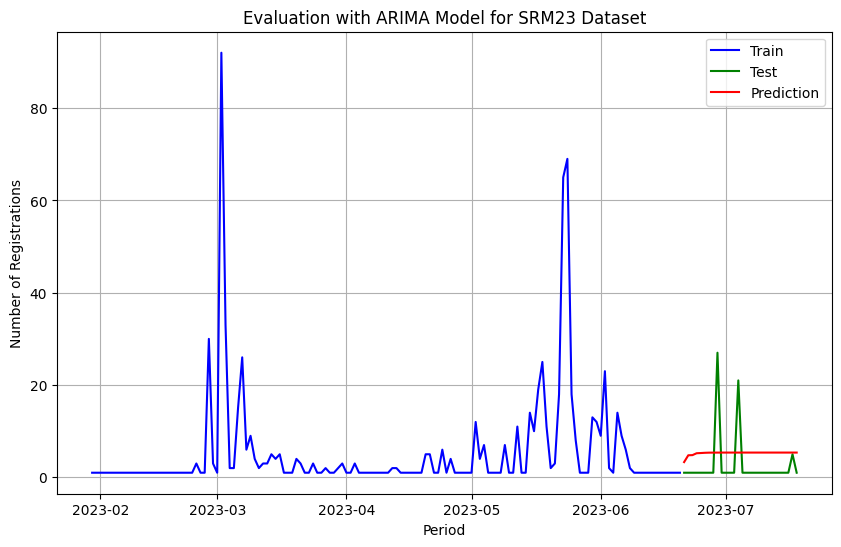

In [230]:
# Plot train, test, and prediction
plt.figure(figsize=(10, 6))
plt.plot(total_registered.index[:len(train)], train, label='Train', color='blue')
plt.plot(total_registered.index[len(train):len(train) + len(test)], test, label='Test', color='green')
plt.plot(total_registered.index[len(train):len(train) + len(test)], pred, label='Prediction', color='red')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title("Evaluation with ARIMA Model for SRM23 Dataset")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima_k-Fold/Individual/Daily Data/Training/SRM23_Arima_5-fold_80%.png')

In [231]:
# Fit ARIMA model to the entire dataset
final_model = ARIMA(total_registered, order=(3, 0, 1)).fit()

# Forecast future values for the next 42 days (adjust as needed)
prediction = final_model.predict(len(total_registered), len(total_registered) + 42)
print(prediction)

2023-07-19    2.397959
2023-07-20    4.960352
2023-07-21    4.173023
2023-07-22    4.963785
2023-07-23    4.801659
2023-07-24    4.926917
2023-07-25    4.924849
2023-07-26    4.935085
2023-07-27    4.941692
2023-07-28    4.941499
2023-07-29    4.943542
2023-07-30    4.943452
2023-07-31    4.943828
2023-08-01    4.943866
2023-08-02    4.943916
2023-08-03    4.943938
2023-08-04    4.943944
2023-08-05    4.943950
2023-08-06    4.943951
2023-08-07    4.943952
2023-08-08    4.943953
2023-08-09    4.943953
2023-08-10    4.943953
2023-08-11    4.943953
2023-08-12    4.943953
2023-08-13    4.943953
2023-08-14    4.943953
2023-08-15    4.943953
2023-08-16    4.943953
2023-08-17    4.943953
2023-08-18    4.943953
2023-08-19    4.943953
2023-08-20    4.943953
2023-08-21    4.943953
2023-08-22    4.943953
2023-08-23    4.943953
2023-08-24    4.943953
2023-08-25    4.943953
2023-08-26    4.943953
2023-08-27    4.943953
2023-08-28    4.943953
2023-08-29    4.943953
2023-08-30    4.943953
Freq: D, Na

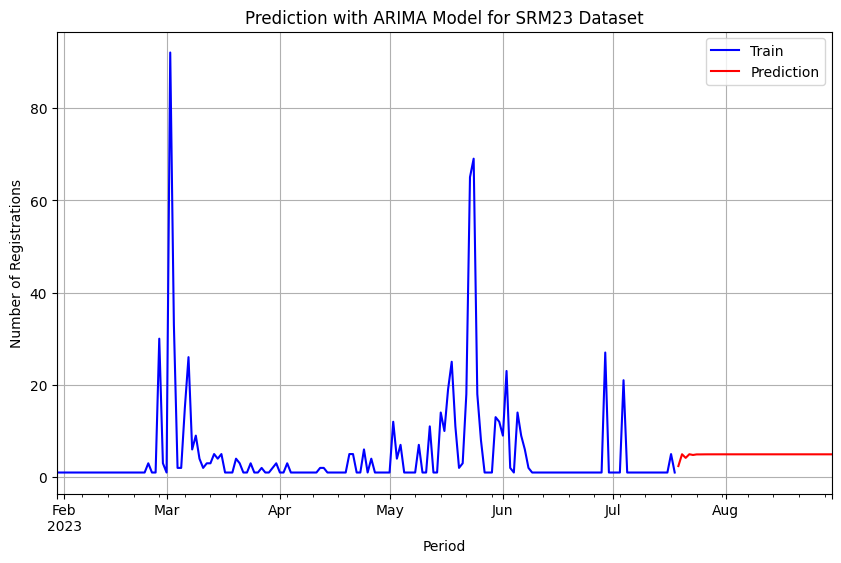

In [232]:
#Plotting the prediction graph
total_registered.plot(legend = True, label = 'Train', color='blue', figsize = (10, 6))
prediction.plot(legend = True, label = 'Prediction', color='red')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title("Prediction with ARIMA Model for SRM23 Dataset")
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima_k-Fold/Individual/Daily Data/Prediction/SRM23_Arima_5-fold_80%.png')

In [ ]:
#..............................................Finding optimal Hyperparameters..................................................#

In [225]:
# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this number based on your preference

# Define the range for p, d, and q
p_range = range(0, 8)
d_range = range(0, 2)
q_range = range(0, 8)

# Generate all possible combinations of p, d, and q
pdq_combinations = list(itertools.product(p_range, d_range, q_range))

# Initialize lists to store results
rmse_scores = []
parameter_combinations = []

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform k-fold cross-validation
for pdq in pdq_combinations:
    rmse_scores_fold = []
    for train_index, test_index in tscv.split(total_registered):
        train = total_registered[train_index]
        test = total_registered[test_index]
        try:
            # Fit ARIMA model and make predictions
            model = ARIMA(train, order=pdq).fit()
            pred = model.predict(start=test.index[0], end=test.index[-1], typ='levels')
            # Calculate RMSE for each fold
            rmse_fold = np.sqrt(mean_squared_error(test, pred))
            rmse_scores_fold.append(rmse_fold)
        except Exception as e:
            print(f'Error fitting model for parameter {pdq}: {str(e)}')
            continue
    if rmse_scores_fold:
        # Calculate the mean RMSE across all folds for the current parameter combination
        mean_rmse = np.mean(rmse_scores_fold)
        # Append mean RMSE and corresponding parameter combination to lists
        rmse_scores.append(mean_rmse)
        parameter_combinations.append(pdq)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Parameter': parameter_combinations, 'Mean RMSE': rmse_scores})

# Sort the DataFrame by Mean RMSE
result_df = result_df.sort_values(by='Mean RMSE')

# Print the DataFrame
print(result_df)

    Parameter  Mean RMSE
49  (3, 0, 1)   9.854250
71  (4, 0, 7)   9.878952
70  (4, 0, 6)   9.881449
65  (4, 0, 1)   9.919058
87  (5, 0, 7)   9.953011
..        ...        ...
56  (3, 1, 0)  13.761702
40  (2, 1, 0)  14.683857
24  (1, 1, 0)  18.480596
8   (0, 1, 0)  20.044810
91  (5, 1, 3)  36.485005

[128 rows x 2 columns]
